In [3]:
import xgboost as xgb

from glob import glob
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [4]:
t=np.load('allprob.npy')

In [5]:
l=np.load('labels.npy')

In [6]:
t.shape

(57386, 48)

In [7]:
l.shape

(57386,)

In [8]:
from sklearn.cross_validation import train_test_split

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(t, l, test_size=0.2, random_state=42, stratify=l)


In [13]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [14]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 17}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [15]:
bst = xgb.train(param, dtrain, num_round)

In [16]:
preds = bst.predict(dtest)

In [17]:
preds

array([[1.3711072e-03, 1.3742433e-03, 1.0194275e-02, ..., 1.3812622e-03,
        1.3791161e-03, 9.6514690e-01],
       [4.3402109e-04, 4.3501394e-04, 1.2181445e-03, ..., 4.3723578e-04,
        4.3655621e-04, 9.9150652e-01],
       [6.5617036e-04, 6.5767107e-04, 9.3383926e-01, ..., 6.6103018e-04,
        6.6000305e-04, 5.6031797e-02],
       ...,
       [1.0153229e-03, 1.0176455e-03, 1.2375045e-03, ..., 1.0228431e-03,
        1.0212533e-03, 5.5158758e-01],
       [3.5933391e-04, 3.6015594e-04, 1.5529528e-03, ..., 3.8071009e-04,
        3.6143285e-04, 9.9073607e-01],
       [1.4529699e-02, 1.7993584e-03, 1.8053935e-03, ..., 1.8085487e-03,
        1.8057387e-03, 9.5757580e-01]], dtype=float32)

In [20]:
p = np.argmax(preds,axis=1)

In [21]:
p

array([16, 16,  2, ..., 16, 16, 16])

In [23]:
y_test

array([16., 16.,  2., ..., 16., 16., 16.])

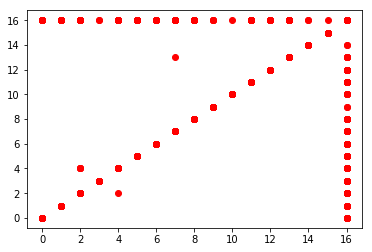

In [27]:
plt.plot(y_test,p,'ro')

In [29]:
ind=y_test==16

In [30]:
p[ind]

array([16, 16, 16, ..., 16, 16, 16])

(array([8.000e+00, 8.000e+00, 1.850e+02, 6.100e+01, 4.600e+01, 4.200e+01,
        2.100e+01, 4.400e+01, 2.900e+01, 2.000e+00, 6.000e+00, 3.300e+01,
        2.500e+01, 6.000e+00, 2.000e+00, 0.000e+00, 5.221e+03]),
 array([ 0.        ,  0.94117647,  1.88235294,  2.82352941,  3.76470588,
         4.70588235,  5.64705882,  6.58823529,  7.52941176,  8.47058824,
         9.41176471, 10.35294118, 11.29411765, 12.23529412, 13.17647059,
        14.11764706, 15.05882353, 16.        ]),
 <a list of 17 Patch objects>)

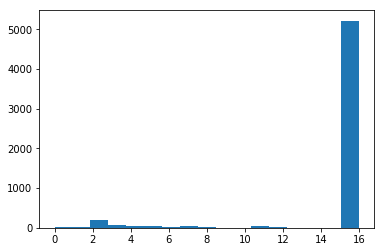

In [33]:
plt.hist(p[ind],bins=17)

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 3.        ,  3.76470588,  4.52941176,  5.29411765,  6.05882353,
         6.82352941,  7.58823529,  8.35294118,  9.11764706,  9.88235294,
        10.64705882, 11.41176471, 12.17647059, 12.94117647, 13.70588235,
        14.47058824, 15.23529412, 16.        ]),
 <a list of 17 Patch objects>)

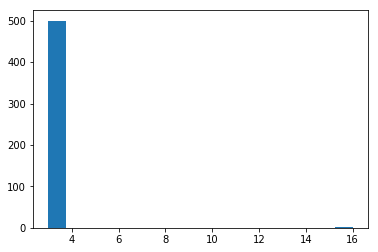

In [37]:
ind=y_test==3
plt.hist(p[ind],bins=17)

In [38]:
t=np.load('allprob.npy')
l=np.load('labels.npy')
X_train, X_test, y_train, y_test = train_test_split(t, l, test_size=0.2, random_state=42, stratify=l)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
bst = xgb.train(param, dtrain, num_round)
preds2 = bst.predict(dtest)
p2 = np.argmax(preds2,axis=1)

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 33.]),
 array([ 1.        ,  1.88235294,  2.76470588,  3.64705882,  4.52941176,
         5.41176471,  6.29411765,  7.17647059,  8.05882353,  8.94117647,
         9.82352941, 10.70588235, 11.58823529, 12.47058824, 13.35294118,
        14.23529412, 15.11764706, 16.        ]),
 <a list of 17 Patch objects>)

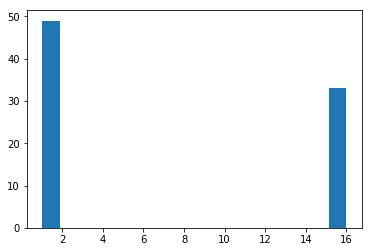

In [61]:
ind=y_test==1
plt.hist(p[ind],bins=17)

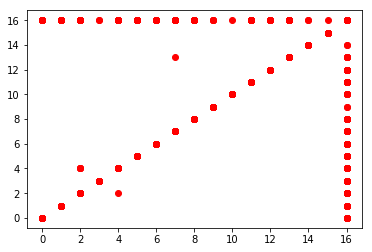

In [57]:
plt.plot(y_test,p2,'ro')